# The Reuters dataset
**a multiclass classification example**

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s
take a look.

### 3.12 Loading the Reuters dataset

In [0]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)#making the dataset of 10,000 most frequently occurring words

Using TensorFlow backend.


2121728/2110848 [==============================] - 0s 0us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
print(train_data[0])# first review

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


### 3.13Decoding newswires back to text

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])# decoding the first row back to text

565248/550378 [==============================] - 0s 0us/step


In [0]:
train_labels[10]

3

In [0]:
decoded_newswire

u'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

##3.2  Preparing the data

### 3.2.1 Encoding the data

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)#Vectorizer train data
x_test = vectorize_sequences(test_data)#vectorizer test data

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
## Vectorize train and test labels using built-in keras function
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.2.3 Building your network

In [0]:
from keras import layers,models

In [0]:
model = models.Sequential()

# Hidden layer 1
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

# hidden layer 2
model.add(layers.Dense(64, activation='relu'))

# ooutput layer
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

## 3.3 Validating your approach

Let’s set apart 1,000 samples in the training data to use as a validation set

###3.3.1  Setting aside a validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 3.3.2 Training the model

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))#traing for 20 epochs

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 203us/step - loss: 2.4969 - acc: 0.4904 - val_loss: 1.6813 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0476 - acc: 0.7707 - val_loss: 1.1178 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.8235 - acc: 0.8282 - val_loss: 1.0226 - val_acc: 0.7780
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.6591 - acc: 0.8637 - val_loss: 0.9719 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.5251 - acc: 0.8929 - val_loss: 0.9201 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.4295 - acc: 0.9108 - val_loss: 0.9136 - val_acc: 0.8010


7982/7982 [==============================] - 1s 146us/step - loss: 0.2908 - acc: 0.9384 - val_loss: 0.9138 - val_acc: 0.8080
Epoch 10/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.2463 - acc: 0.9448 - val_loss: 0.9143 - val_acc: 0.8130
Epoch 11/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.2121 - acc: 0.9485 - val_loss: 0.9514 - val_acc: 0.8100
Epoch 12/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1892 - acc: 0.9526 - val_loss: 0.9604 - val_acc: 0.8060
Epoch 13/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.1668 - acc: 0.9525 - val_loss: 0.9977 - val_acc: 0.7950
Epoch 14/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1546 - acc: 0.9541 - val_loss: 0.9801 - val_acc: 0.8050
Epoch 15/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.1469 - acc: 0.9546 - val_loss: 1.0238 - val_acc: 0.7980
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 151us/step - loss: 0.1181 - acc: 0.9563 - val_loss: 1.0456 - val_acc: 0.8140
Epoch 19/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1176 - acc: 0.9569 - val_loss: 1.0332 - val_acc: 0.8070
Epoch 20/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1153 - acc: 0.9575 - val_loss: 1.0541 - val_acc: 0.8030


### 3.3.3 Plotting the training and validation loss

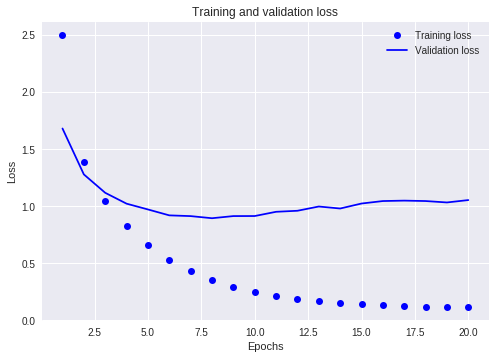

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.3.4 Plotting the training and validation accuracy

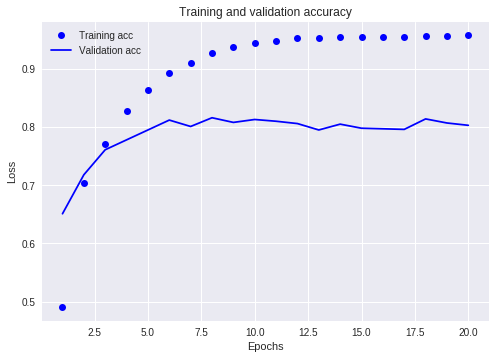

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Observations**
* The network begins to overfit after nine epochs. 
* Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

### 3.3.5 Retraining a model from scratch

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))#Model with 9 epochs

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 161us/step - loss: 2.4662 - acc: 0.5314 - val_loss: 1.6363 - val_acc: 0.6510
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.3477 - acc: 0.7211 - val_loss: 1.2601 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 151us/step - loss: 1.0078 - acc: 0.7913 - val_loss: 1.1424 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.8025 - acc: 0.8290 - val_loss: 1.0140 - val_acc: 0.7890
Epoch 5/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.6359 - acc: 0.8658 - val_loss: 0.9880 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.5115 - acc: 0.8919 - val_loss: 0.9317 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.4116 - acc: 0.9113 - val_loss: 0.9232 - val_acc: 0.8020
Epoch 8

2246/2246 [==============================] - 0s 114us/step


In [0]:
results

[0.9799815752839575, 0.7836153161440804]

### 3.3.6 Comparison with random baseline

In [0]:
import copy

In [0]:
test_labels_copy = copy.copy(test_labels)

In [0]:
test_labels_copy

array([ 3, 10,  1, ...,  3,  3, 24])

In [0]:
np.random.shuffle(test_labels_copy)

In [0]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [0]:
hits_array

array([False, False, False, ..., False, False, False])

In [0]:
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

Thus a random classifier gets a result closer to 19%.

This means our naive model does a pretty good job compared to a random baseline

## 3.4 Generating predictions on new data

### 3.4.1 Generating predictions for new data

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions

array([[3.0065852e-04, 4.1537313e-04, 1.1777668e-05, ..., 3.7633497e-04,
        4.3693185e-06, 8.3263276e-06],
       [9.7704055e-03, 2.8166387e-02, 2.3261255e-03, ..., 2.9999301e-05,
        2.0469583e-04, 2.3240090e-04],
       [8.9360019e-03, 7.2709453e-01, 3.5117064e-03, ..., 1.2005242e-04,
        2.1959001e-03, 1.2024097e-03],
       ...,
       [2.2505754e-05, 2.0794429e-04, 2.6390850e-05, ..., 8.5873282e-05,
        2.4255105e-06, 3.8740518e-06],
       [5.2037216e-03, 2.5934726e-02, 2.2171566e-03, ..., 3.8686451e-03,
        8.1460312e-04, 7.7010161e-04],
       [1.0389665e-04, 8.6087537e-01, 4.4489494e-03, ..., 2.0292635e-05,
        9.4074472e-05, 1.2326859e-04]], dtype=float32)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])#vector sum

1.0

In [0]:
np.argmax(predictions[0])#class with the highest probability

3

# 4 Building the model with -
1) Try to use only 4 units(instead of 64) in the second hidden layer of the above architecture.

2) Try to use 2 hidden layers each with 32 units.

3) Try to use 2 hidden layers each with 128 units.

4) Try to use only 1 hidden layer (with 64 units).

5) Try to use 3 hidden layers (each with 64 units.


## **4.1 1) Try to use only 4 units(instead of 64) in the second hidden layer of the above architecture.**

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 267us/step - loss: 2.6508 - acc: 0.4728 - val_loss: 1.8770 - val_acc: 0.5990
Epoch 2/20
7982/7982 [==============================] - 2s 219us/step - loss: 1.6147 - acc: 0.6378 - val_loss: 1.5800 - val_acc: 0.6390
Epoch 3/20
7982/7982 [==============================] - 2s 217us/step - loss: 1.3261 - acc: 0.6805 - val_loss: 1.4220 - val_acc: 0.6640
Epoch 4/20
7982/7982 [==============================] - 2s 228us/step - loss: 1.1391 - acc: 0.7309 - val_loss: 1.3527 - val_acc: 0.6990
Epoch 5/20
7982/7982 [==============================] - 2s 218us/step - loss: 1.0091 - acc: 0.7516 - val_loss: 1.3343 - val_acc: 0.6960
Epoch 6/20
7982/7982 [==============================] - 2s 224us/step - loss: 0.9180 - acc: 0.7650 - val_loss: 1.3140 - val_acc: 0.7160
Epoch 7/20
1408/7982 [====>.........................] - ETA: 1s - loss: 0.8716 - acc: 0.7706

7982/7982 [==============================] - 2s 222us/step - loss: 0.8486 - acc: 0.7829 - val_loss: 1.3383 - val_acc: 0.7150
Epoch 8/20
7982/7982 [==============================] - 2s 224us/step - loss: 0.7882 - acc: 0.7967 - val_loss: 1.3730 - val_acc: 0.7110
Epoch 9/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.7393 - acc: 0.8053 - val_loss: 1.3703 - val_acc: 0.7130
Epoch 10/20
7982/7982 [==============================] - 2s 221us/step - loss: 0.6931 - acc: 0.8166 - val_loss: 1.4448 - val_acc: 0.7020
Epoch 11/20
7982/7982 [==============================] - 2s 221us/step - loss: 0.6548 - acc: 0.8249 - val_loss: 1.4841 - val_acc: 0.7010
Epoch 12/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.6186 - acc: 0.8324 - val_loss: 1.4647 - val_acc: 0.7140
Epoch 13/20
4608/7982 [================>.............] - ETA: 0s - loss: 0.5772 - acc: 0.8385

7982/7982 [==============================] - 2s 222us/step - loss: 0.5864 - acc: 0.8379 - val_loss: 1.4997 - val_acc: 0.7150
Epoch 14/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.5589 - acc: 0.8450 - val_loss: 1.5725 - val_acc: 0.7060
Epoch 15/20
7982/7982 [==============================] - 2s 221us/step - loss: 0.5348 - acc: 0.8530 - val_loss: 1.5510 - val_acc: 0.7170
Epoch 16/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.5112 - acc: 0.8583 - val_loss: 1.5843 - val_acc: 0.7160
Epoch 17/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.4915 - acc: 0.8633 - val_loss: 1.6853 - val_acc: 0.7170
Epoch 18/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.4725 - acc: 0.8654 - val_loss: 1.6911 - val_acc: 0.7120
Epoch 19/20
6144/7982 [======================>.......] - ETA: 0s - loss: 0.4530 - acc: 0.8703

7982/7982 [==============================] - 2s 211us/step - loss: 0.4544 - acc: 0.8687 - val_loss: 1.7753 - val_acc: 0.7090
Epoch 20/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.4422 - acc: 0.8736 - val_loss: 1.7870 - val_acc: 0.7030


**Observation :**
* The network now peaks at ~70% validation accuracy, an 8% absolute drop.
* This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. T
* he network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.

## 4.2. 2) Try to use 2 hidden layers each with 32 units.

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))# 1hidden layer
model.add(layers.Dense(32, activation='relu'))# 2 hidden layer
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 226us/step - loss: 2.1649 - acc: 0.5791 - val_loss: 1.4553 - val_acc: 0.6830
Epoch 2/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.2261 - acc: 0.7258 - val_loss: 1.1673 - val_acc: 0.7400
Epoch 3/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.9199 - acc: 0.7988 - val_loss: 1.0217 - val_acc: 0.7840
Epoch 4/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.7062 - acc: 0.8504 - val_loss: 0.9482 - val_acc: 0.8060
Epoch 5/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5496 - acc: 0.8811 - val_loss: 0.9185 - val_acc: 0.8130
Epoch 6/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.4332 - acc: 0.9068 - val_loss: 0.8983 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.3490 - acc: 0.9225 - val_loss: 0.9132 - val_acc: 0.8080


7982/7982 [==============================] - 1s 173us/step - loss: 0.2868 - acc: 0.9367 - val_loss: 0.9309 - val_acc: 0.8130
Epoch 9/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.2409 - acc: 0.9439 - val_loss: 0.9775 - val_acc: 0.7950
Epoch 10/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.2119 - acc: 0.9496 - val_loss: 0.9805 - val_acc: 0.8020
Epoch 11/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.1854 - acc: 0.9538 - val_loss: 0.9777 - val_acc: 0.8080
Epoch 12/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.1736 - acc: 0.9533 - val_loss: 1.0466 - val_acc: 0.7990
Epoch 13/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.1579 - acc: 0.9540 - val_loss: 1.0686 - val_acc: 0.8000
Epoch 14/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.1471 - acc: 0.9557 - val_loss: 1.1017 - val_acc: 0.8000
Epoch 15/20
7982/7982 [==============================]

7982/7982 [==============================] - 1s 168us/step - loss: 0.1345 - acc: 0.9564 - val_loss: 1.0858 - val_acc: 0.8010
Epoch 17/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.1275 - acc: 0.9589 - val_loss: 1.1325 - val_acc: 0.7960
Epoch 18/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.1269 - acc: 0.9573 - val_loss: 1.1295 - val_acc: 0.8050
Epoch 19/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.1213 - acc: 0.9572 - val_loss: 1.1867 - val_acc: 0.7980
Epoch 20/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.1142 - acc: 0.9579 - val_loss: 1.2523 - val_acc: 0.7910


**Observation :**
* The network now peaks at ~79.1% validation accuracy, an 0.9% absolute drop.
Better then the previous model.

## 4.3. 3) Try to use 2 hidden layers each with 128 units.

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))# 1hidden layer
model.add(layers.Dense(128, activation='relu'))# 2 hidden layer
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 373us/step - loss: 1.5474 - acc: 0.6761 - val_loss: 1.0562 - val_acc: 0.7670
Epoch 2/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.7418 - acc: 0.8388 - val_loss: 0.8884 - val_acc: 0.8110
Epoch 3/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.4427 - acc: 0.9047 - val_loss: 0.8261 - val_acc: 0.8310
Epoch 4/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.2962 - acc: 0.9356 - val_loss: 0.8385 - val_acc: 0.8310
Epoch 5/20
7982/7982 [==============================] - 2s 299us/step - loss: 0.2233 - acc: 0.9466 - val_loss: 0.8652 - val_acc: 0.8270
Epoch 6/20
7982/7982 [==============================] - 2s 300us/step - loss: 0.1933 - acc: 0.9508 - val_loss: 0.9026 - val_acc: 0.8230
Epoch 7/20
 896/7982 [==>...........................] - ETA: 2s - loss: 0.1615 - acc: 0.9520

7982/7982 [==============================] - 2s 301us/step - loss: 0.1679 - acc: 0.9524 - val_loss: 1.1579 - val_acc: 0.7830
Epoch 8/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.1523 - acc: 0.9545 - val_loss: 1.0411 - val_acc: 0.8080
Epoch 9/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.1406 - acc: 0.9541 - val_loss: 1.0595 - val_acc: 0.8020
Epoch 10/20
7982/7982 [==============================] - 2s 306us/step - loss: 0.1379 - acc: 0.9548 - val_loss: 1.0770 - val_acc: 0.7950
Epoch 11/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.1237 - acc: 0.9555 - val_loss: 1.0809 - val_acc: 0.7980
Epoch 12/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.1217 - acc: 0.9541 - val_loss: 1.1440 - val_acc: 0.8010
Epoch 13/20
4224/7982 [==============>...............] - ETA: 1s - loss: 0.0891 - acc: 0.9645

7982/7982 [==============================] - 2s 303us/step - loss: 0.1138 - acc: 0.9557 - val_loss: 1.1400 - val_acc: 0.8010
Epoch 14/20
7982/7982 [==============================] - 2s 300us/step - loss: 0.1088 - acc: 0.9565 - val_loss: 1.1893 - val_acc: 0.8040
Epoch 15/20
7982/7982 [==============================] - 2s 299us/step - loss: 0.1043 - acc: 0.9553 - val_loss: 1.1448 - val_acc: 0.8060
Epoch 16/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.1005 - acc: 0.9563 - val_loss: 1.2644 - val_acc: 0.7930
Epoch 17/20
7982/7982 [==============================] - 2s 300us/step - loss: 0.0960 - acc: 0.9553 - val_loss: 1.3550 - val_acc: 0.7810
Epoch 18/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.0930 - acc: 0.9585 - val_loss: 1.3131 - val_acc: 0.7980
Epoch 19/20
4480/7982 [===============>..............] - ETA: 1s - loss: 0.0779 - acc: 0.9621

7982/7982 [==============================] - 2s 302us/step - loss: 0.0902 - acc: 0.9572 - val_loss: 1.3248 - val_acc: 0.8030
Epoch 20/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.0854 - acc: 0.9592 - val_loss: 1.4230 - val_acc: 0.8010


**Observation : **
*  The network now peaks at ~80.1% validation accuracy. Better then the previous model.

## 4.4 4)  Try to use only 1 hidden layer (with 64 units).

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))#1 hidden layer
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 303us/step - loss: 1.8764 - acc: 0.6457 - val_loss: 1.2151 - val_acc: 0.7520
Epoch 2/20
7982/7982 [==============================] - 2s 218us/step - loss: 0.9422 - acc: 0.8026 - val_loss: 0.9717 - val_acc: 0.8050
Epoch 3/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.6399 - acc: 0.8730 - val_loss: 0.8698 - val_acc: 0.8270
Epoch 4/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.4582 - acc: 0.9088 - val_loss: 0.8233 - val_acc: 0.8310
Epoch 5/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.3395 - acc: 0.9283 - val_loss: 0.8120 - val_acc: 0.8280
Epoch 6/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.2648 - acc: 0.9419 - val_loss: 0.8219 - val_acc: 0.8340
Epoch 7/20
2944/7982 [==========>...................] - ETA: 1s - loss: 0.2029 - acc: 0.9524

7982/7982 [==============================] - 2s 212us/step - loss: 0.2190 - acc: 0.9476 - val_loss: 0.8372 - val_acc: 0.8270
Epoch 8/20
7982/7982 [==============================] - 2s 211us/step - loss: 0.1855 - acc: 0.9508 - val_loss: 0.8864 - val_acc: 0.8210
Epoch 9/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.1633 - acc: 0.9535 - val_loss: 0.9012 - val_acc: 0.8130
Epoch 10/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.1479 - acc: 0.9553 - val_loss: 0.9252 - val_acc: 0.8130
Epoch 11/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.1359 - acc: 0.9557 - val_loss: 0.9776 - val_acc: 0.8190
Epoch 12/20
7982/7982 [==============================] - 2s 210us/step - loss: 0.1295 - acc: 0.9574 - val_loss: 1.0138 - val_acc: 0.8140
Epoch 13/20
6912/7982 [========================>.....] - ETA: 0s - loss: 0.1186 - acc: 0.9580

7982/7982 [==============================] - 2s 216us/step - loss: 0.1239 - acc: 0.9572 - val_loss: 1.0143 - val_acc: 0.8110
Epoch 14/20
7982/7982 [==============================] - 2s 216us/step - loss: 0.1212 - acc: 0.9564 - val_loss: 1.0204 - val_acc: 0.8110
Epoch 15/20
7982/7982 [==============================] - 2s 214us/step - loss: 0.1166 - acc: 0.9580 - val_loss: 1.0806 - val_acc: 0.8070
Epoch 16/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.1116 - acc: 0.9553 - val_loss: 1.0906 - val_acc: 0.8030
Epoch 17/20
7982/7982 [==============================] - 2s 211us/step - loss: 0.1099 - acc: 0.9572 - val_loss: 1.1015 - val_acc: 0.8110
Epoch 18/20
7982/7982 [==============================] - 2s 214us/step - loss: 0.1054 - acc: 0.9582 - val_loss: 1.1375 - val_acc: 0.8020
Epoch 19/20
6528/7982 [=======================>......] - ETA: 0s - loss: 0.1058 - acc: 0.9573

7982/7982 [==============================] - 2s 217us/step - loss: 0.1083 - acc: 0.9563 - val_loss: 1.1596 - val_acc: 0.8050
Epoch 20/20
7982/7982 [==============================] - 2s 216us/step - loss: 0.1047 - acc: 0.9583 - val_loss: 1.1148 - val_acc: 0.8050


**Observation :**
* The network now peaks at ~80.5% validation accuracy. Better then the previous model.

## 4.5 5) Try to use 3 hidden layers (each with 64 units.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))# 1hidden layer
model.add(layers.Dense(64, activation='relu'))# 2 hidden layer
model.add(layers.Dense(64, activation='relu'))# 3 hidden layer
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 284us/step - loss: 1.8646 - acc: 0.6116 - val_loss: 1.2962 - val_acc: 0.7080
Epoch 2/20
7982/7982 [==============================] - 2s 217us/step - loss: 1.0352 - acc: 0.7632 - val_loss: 1.1645 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 2s 227us/step - loss: 0.7015 - acc: 0.8468 - val_loss: 0.9927 - val_acc: 0.8060
Epoch 4/20
7982/7982 [==============================] - 2s 228us/step - loss: 0.4871 - acc: 0.8986 - val_loss: 0.9939 - val_acc: 0.8050
Epoch 5/20
7982/7982 [==============================] - 2s 228us/step - loss: 0.3548 - acc: 0.9252 - val_loss: 0.9214 - val_acc: 0.8260
Epoch 6/20
7982/7982 [==============================] - 2s 228us/step - loss: 0.2741 - acc: 0.9417 - val_loss: 1.0876 - val_acc: 0.7820
Epoch 7/20
1152/7982 [===>..........................] - ETA: 1s - loss: 0.1974 - acc: 0.9592

7982/7982 [==============================] - 2s 222us/step - loss: 0.2311 - acc: 0.9481 - val_loss: 1.0922 - val_acc: 0.7910
Epoch 8/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.1995 - acc: 0.9503 - val_loss: 1.1518 - val_acc: 0.7870
Epoch 9/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.1793 - acc: 0.9546 - val_loss: 1.0897 - val_acc: 0.8020
Epoch 10/20
7982/7982 [==============================] - 2s 222us/step - loss: 0.1756 - acc: 0.9565 - val_loss: 1.1732 - val_acc: 0.7960
Epoch 11/20
7982/7982 [==============================] - 2s 219us/step - loss: 0.1671 - acc: 0.9540 - val_loss: 1.1325 - val_acc: 0.7960
Epoch 12/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.1601 - acc: 0.9575 - val_loss: 1.3589 - val_acc: 0.7780
Epoch 13/20
5632/7982 [====================>.........] - ETA: 0s - loss: 0.1259 - acc: 0.9599

7982/7982 [==============================] - 2s 221us/step - loss: 0.1488 - acc: 0.9559 - val_loss: 1.1942 - val_acc: 0.7910
Epoch 14/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.1455 - acc: 0.9587 - val_loss: 1.2145 - val_acc: 0.8010
Epoch 15/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.1432 - acc: 0.9575 - val_loss: 1.2281 - val_acc: 0.7980
Epoch 16/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.1394 - acc: 0.9563 - val_loss: 1.3685 - val_acc: 0.7940
Epoch 17/20
7982/7982 [==============================] - 2s 221us/step - loss: 0.1369 - acc: 0.9569 - val_loss: 1.3283 - val_acc: 0.7850
Epoch 18/20
7982/7982 [==============================] - 2s 222us/step - loss: 0.1321 - acc: 0.9570 - val_loss: 1.4211 - val_acc: 0.7650
Epoch 19/20
4992/7982 [=================>............] - ETA: 0s - loss: 0.1149 - acc: 0.9615

7982/7982 [==============================] - 2s 225us/step - loss: 0.1301 - acc: 0.9575 - val_loss: 1.2495 - val_acc: 0.7950
Epoch 20/20
7982/7982 [==============================] - 2s 221us/step - loss: 0.1270 - acc: 0.9569 - val_loss: 1.3501 - val_acc: 0.7890


**Observations :**
* We can see that The network now peaks at ~78.9% validation accuracy. Not Better then the previous model.